In [2]:
import numpy as np
import meanderpy as mp
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import viridis
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
mpl.rcParams['figure.dpi'] = 500  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

# ------------------------------------------------------------------------------
# 1. Define the Lorenz system
#    dx/dt = sigma*(y - x)
#    dy/dt = x*(rho - z) - y
#    dz/dt = x*y - beta*z
# ------------------------------------------------------------------------------
def lorenz(state, t, sigma, beta, rho):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# Time range
tmax = 100
nt = 20001
t = np.linspace(0, tmax, nt)

# ------------------------------------------------------------------------------
# 2. Integrate the Lorenz system from two close initial conditions
#    to estimate the largest Lyapunov exponent.
# ------------------------------------------------------------------------------
# Initial condition 1
X0 = np.array([1.0, 1.0, 1.0])
# Perturbed initial condition 2
perturbation = 1e-8
X0_pert = X0 + np.array([perturbation, 0.0, 0.0])

# Solve for both
sol1 = odeint(lorenz, X0, t, args=(sigma, beta, rho))
sol2 = odeint(lorenz, X0_pert, t, args=(sigma, beta, rho))

# Calculate the distance between the two solutions at each time
dist = np.sqrt(np.sum((sol1 - sol2)**2, axis=1))
# Avoid log(0) issues by clipping small distances
dist = np.clip(dist, 1e-30, None)
log_dist = np.log(dist)

# We'll do a linear fit to log(distance) vs time over some portion,
# typically an early window where exponential divergence is clear
t_fit_start = 5  # skip the very early transient to allow typical behavior
t_fit_end   = 20
mask = (t >= t_fit_start) & (t <= t_fit_end)

# Linear fit to log_dist in the chosen window
coef = np.polyfit(t[mask], log_dist[mask], 1)
lyapunov_exp_approx = coef[0]

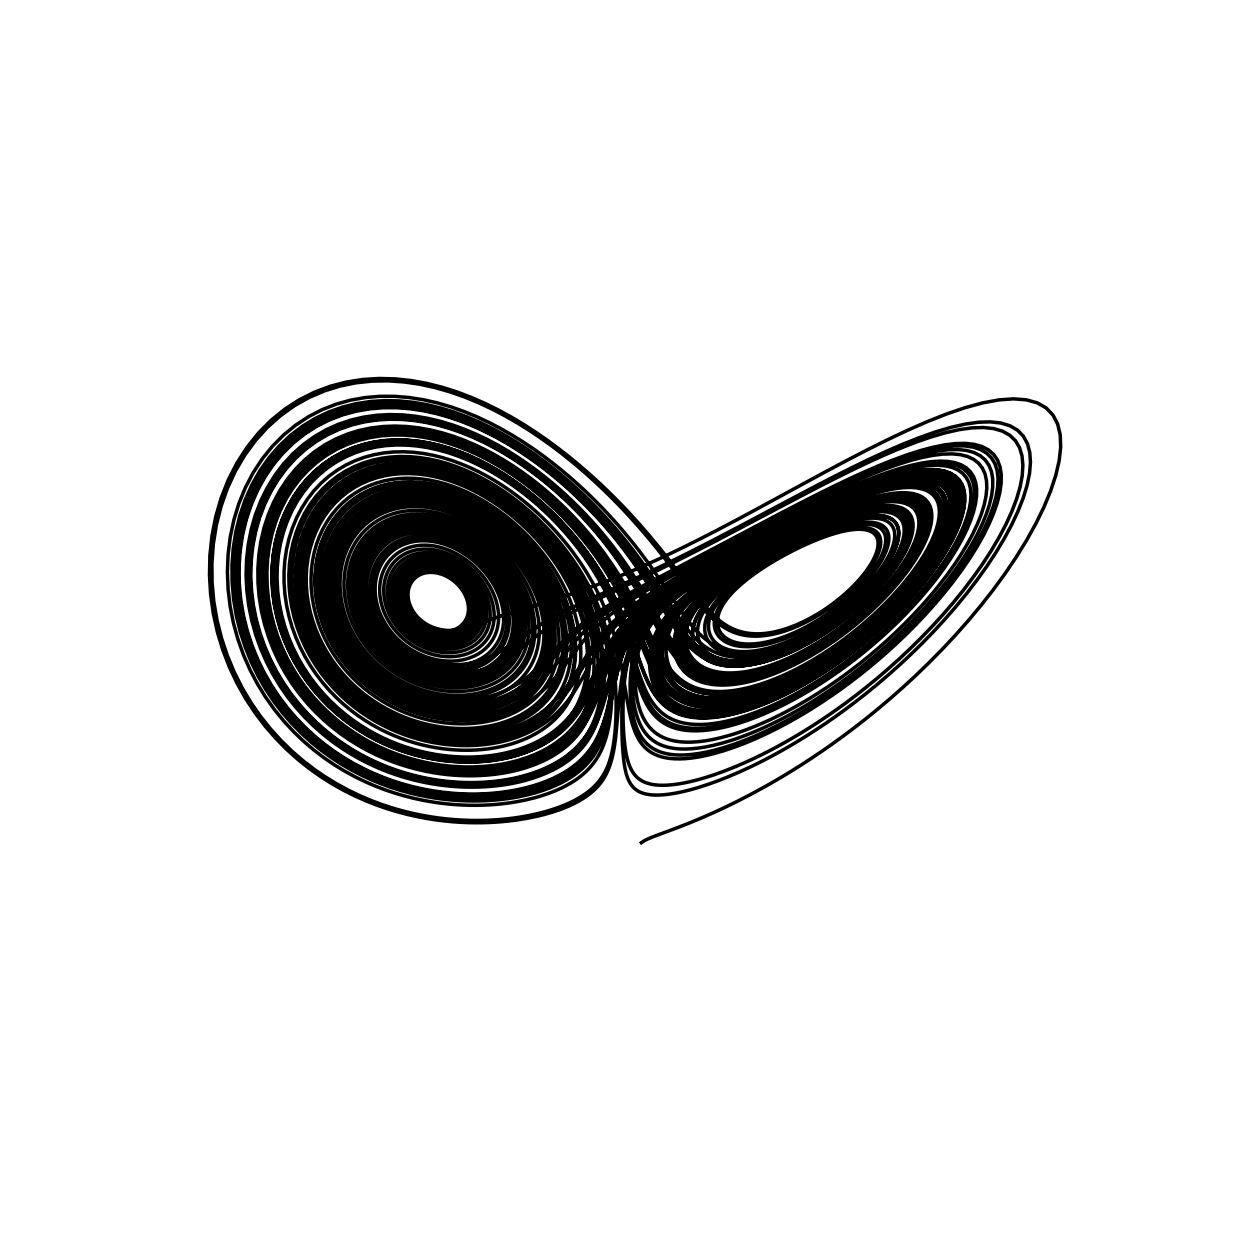

In [42]:
fig = plt.figure(figsize=(4,3))
ax1 = fig.add_subplot(111, projection='3d')

# Plot the data with a thin line width
ax1.plot(sol1[:, 0], sol1[:, 1], sol1[:, 2], color='black', lw=0.5)


# Make the background transparent
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False

# Remove grid lines for a cleaner transparent look
ax1.grid(False)
ax1.axis("off")

# Show the plot
plt.show()

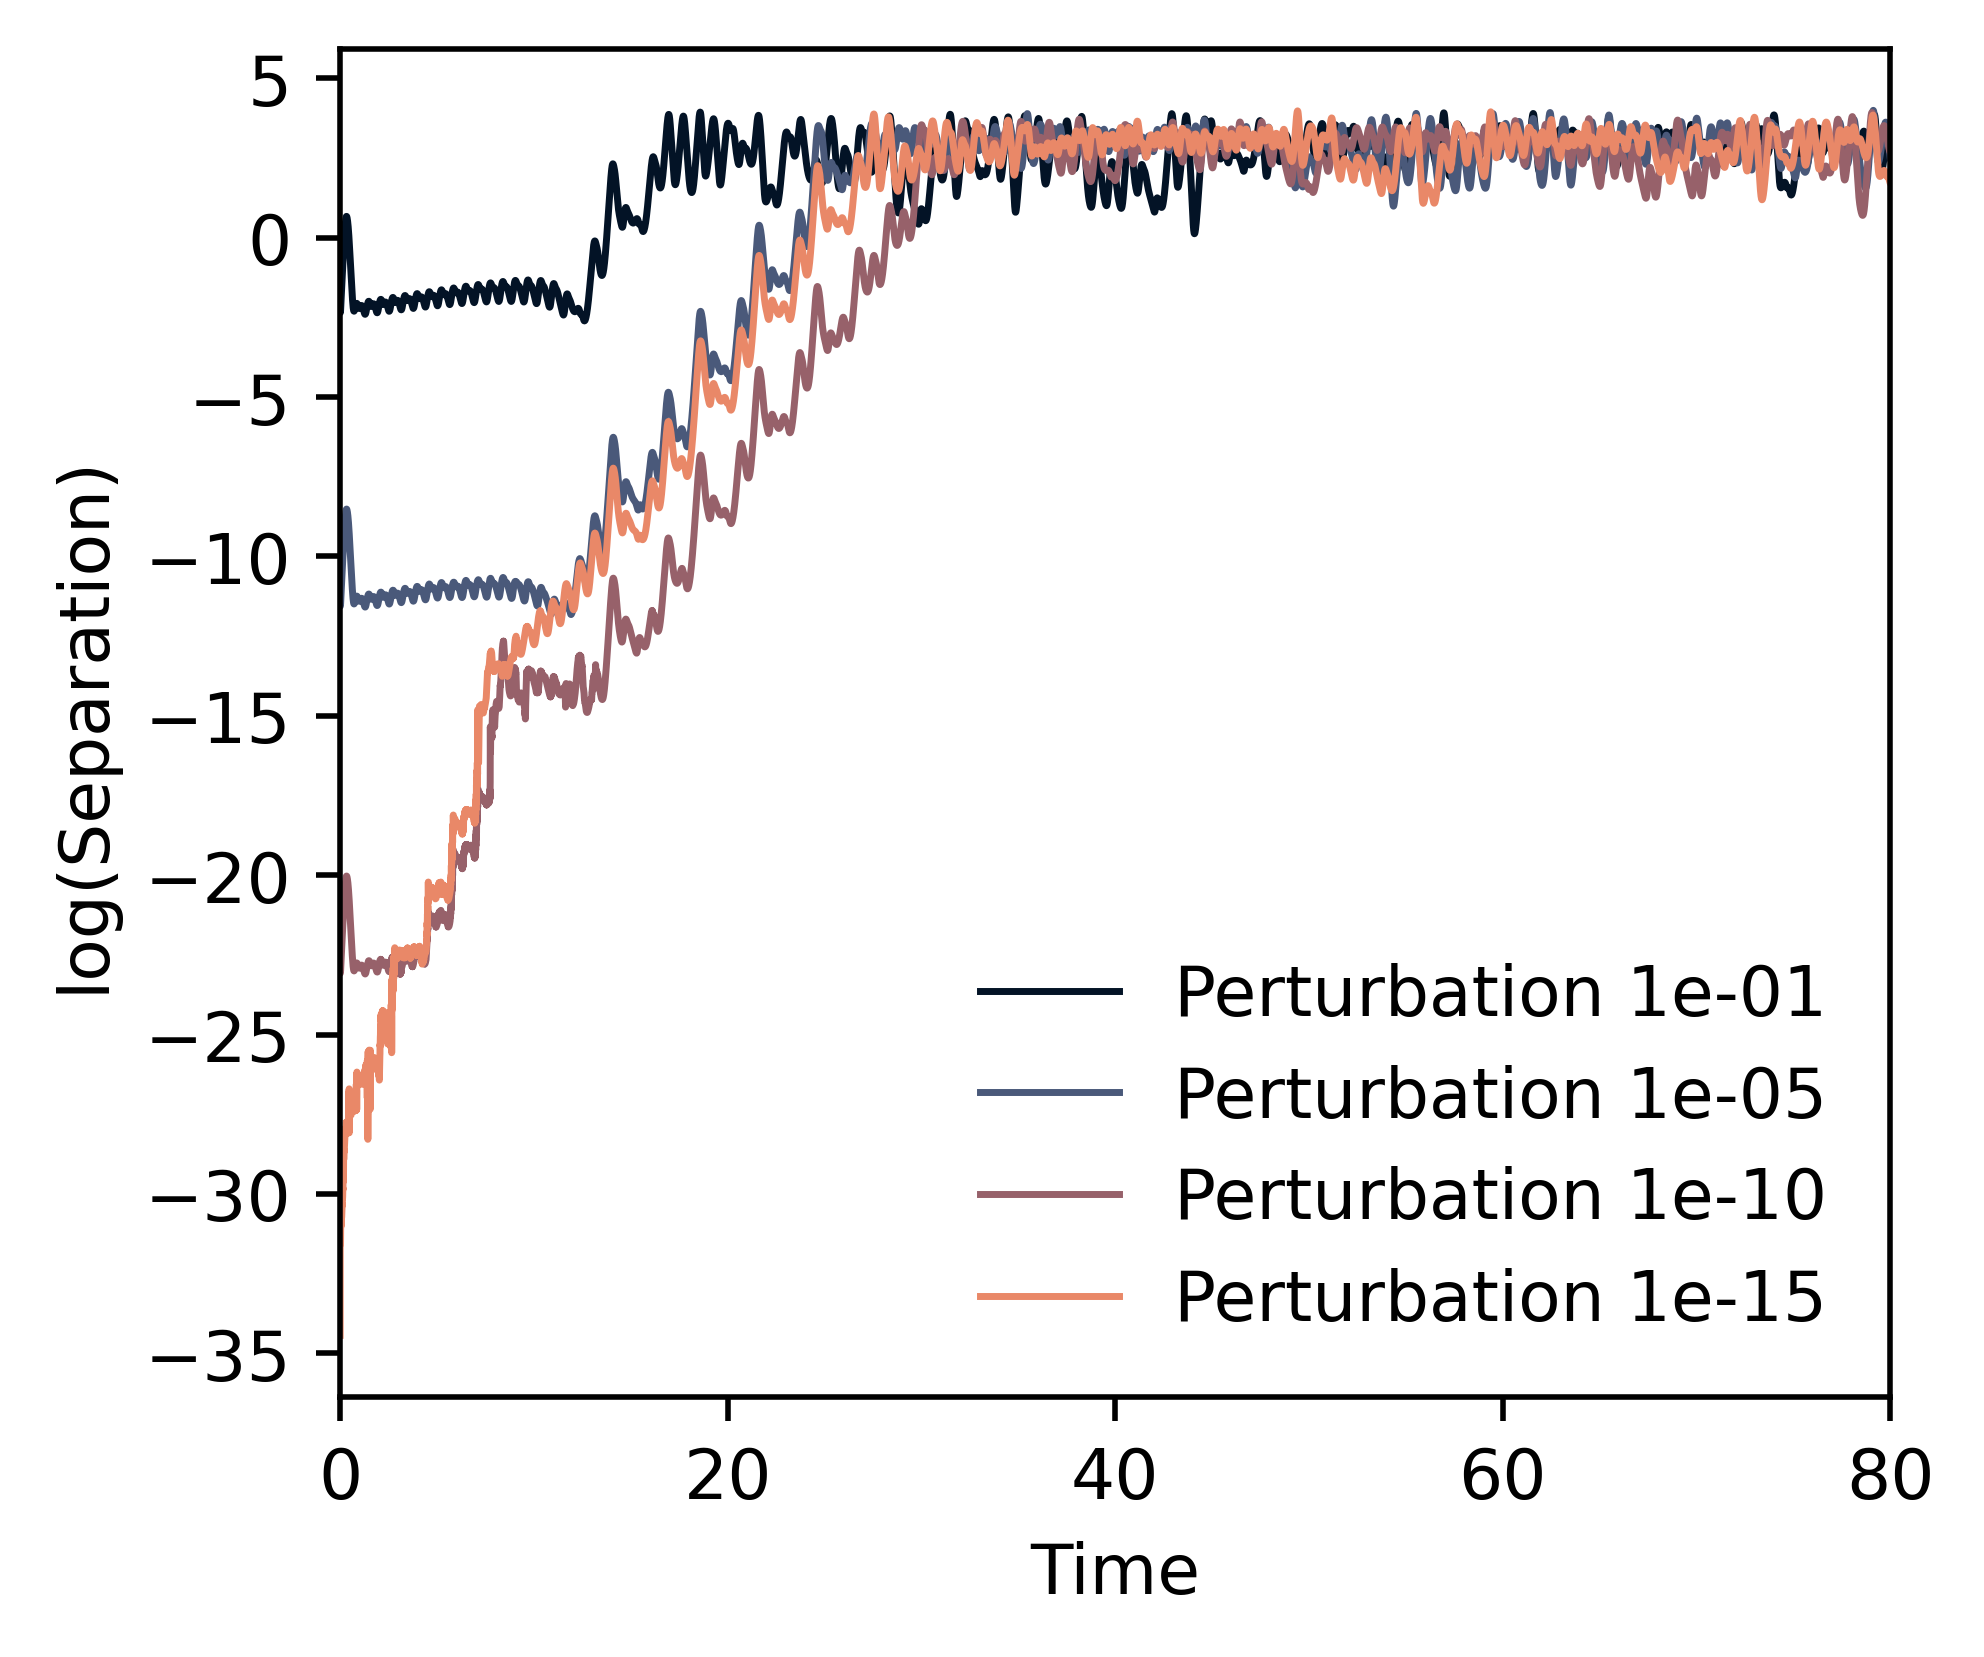

In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc

# Define the Lorenz system
def lorenz(state, t, sigma, beta, rho):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# Time range
tmax = 100
nt = 20001
t = np.linspace(0, tmax, nt)

# Initial condition
X0 = np.array([1.0, 1.0, 1.0])

# Different perturbation values
perturbations = [1e-1, 1e-5, 1e-10, 1e-15]

# Prepare figure
plt.figure(figsize=(4,3.5))

# Get colormap
cmap = cmc.lipari  # Use cmc.lipari instead of crameri.cm.lapaz
colors = cmap(np.linspace(0, 0.7, len(perturbations)))

# Loop over perturbations
for i, perturbation in enumerate(perturbations):
    X0_pert = X0 + np.array([perturbation, 0.0, 0.0])

    # Solve for both
    sol1 = odeint(lorenz, X0, t, args=(sigma, beta, rho))
    sol2 = odeint(lorenz, X0_pert, t, args=(sigma, beta, rho))

    # Calculate the distance between the two solutions at each time
    dist = np.sqrt(np.sum((sol1 - sol2) ** 2, axis=1))
    dist = np.clip(dist, 1e-30, None)  # Avoid log(0) issues
    log_dist = np.log(dist)

    # Plot log of separation vs time
    plt.plot(t, log_dist, label=f'Perturbation {perturbation:.0e}', color=colors[i],lw=1)

plt.xlim([0,80])
plt.xlabel('Time')
plt.ylabel('log(Separation)')
plt.legend(frameon=False)
plt.show()


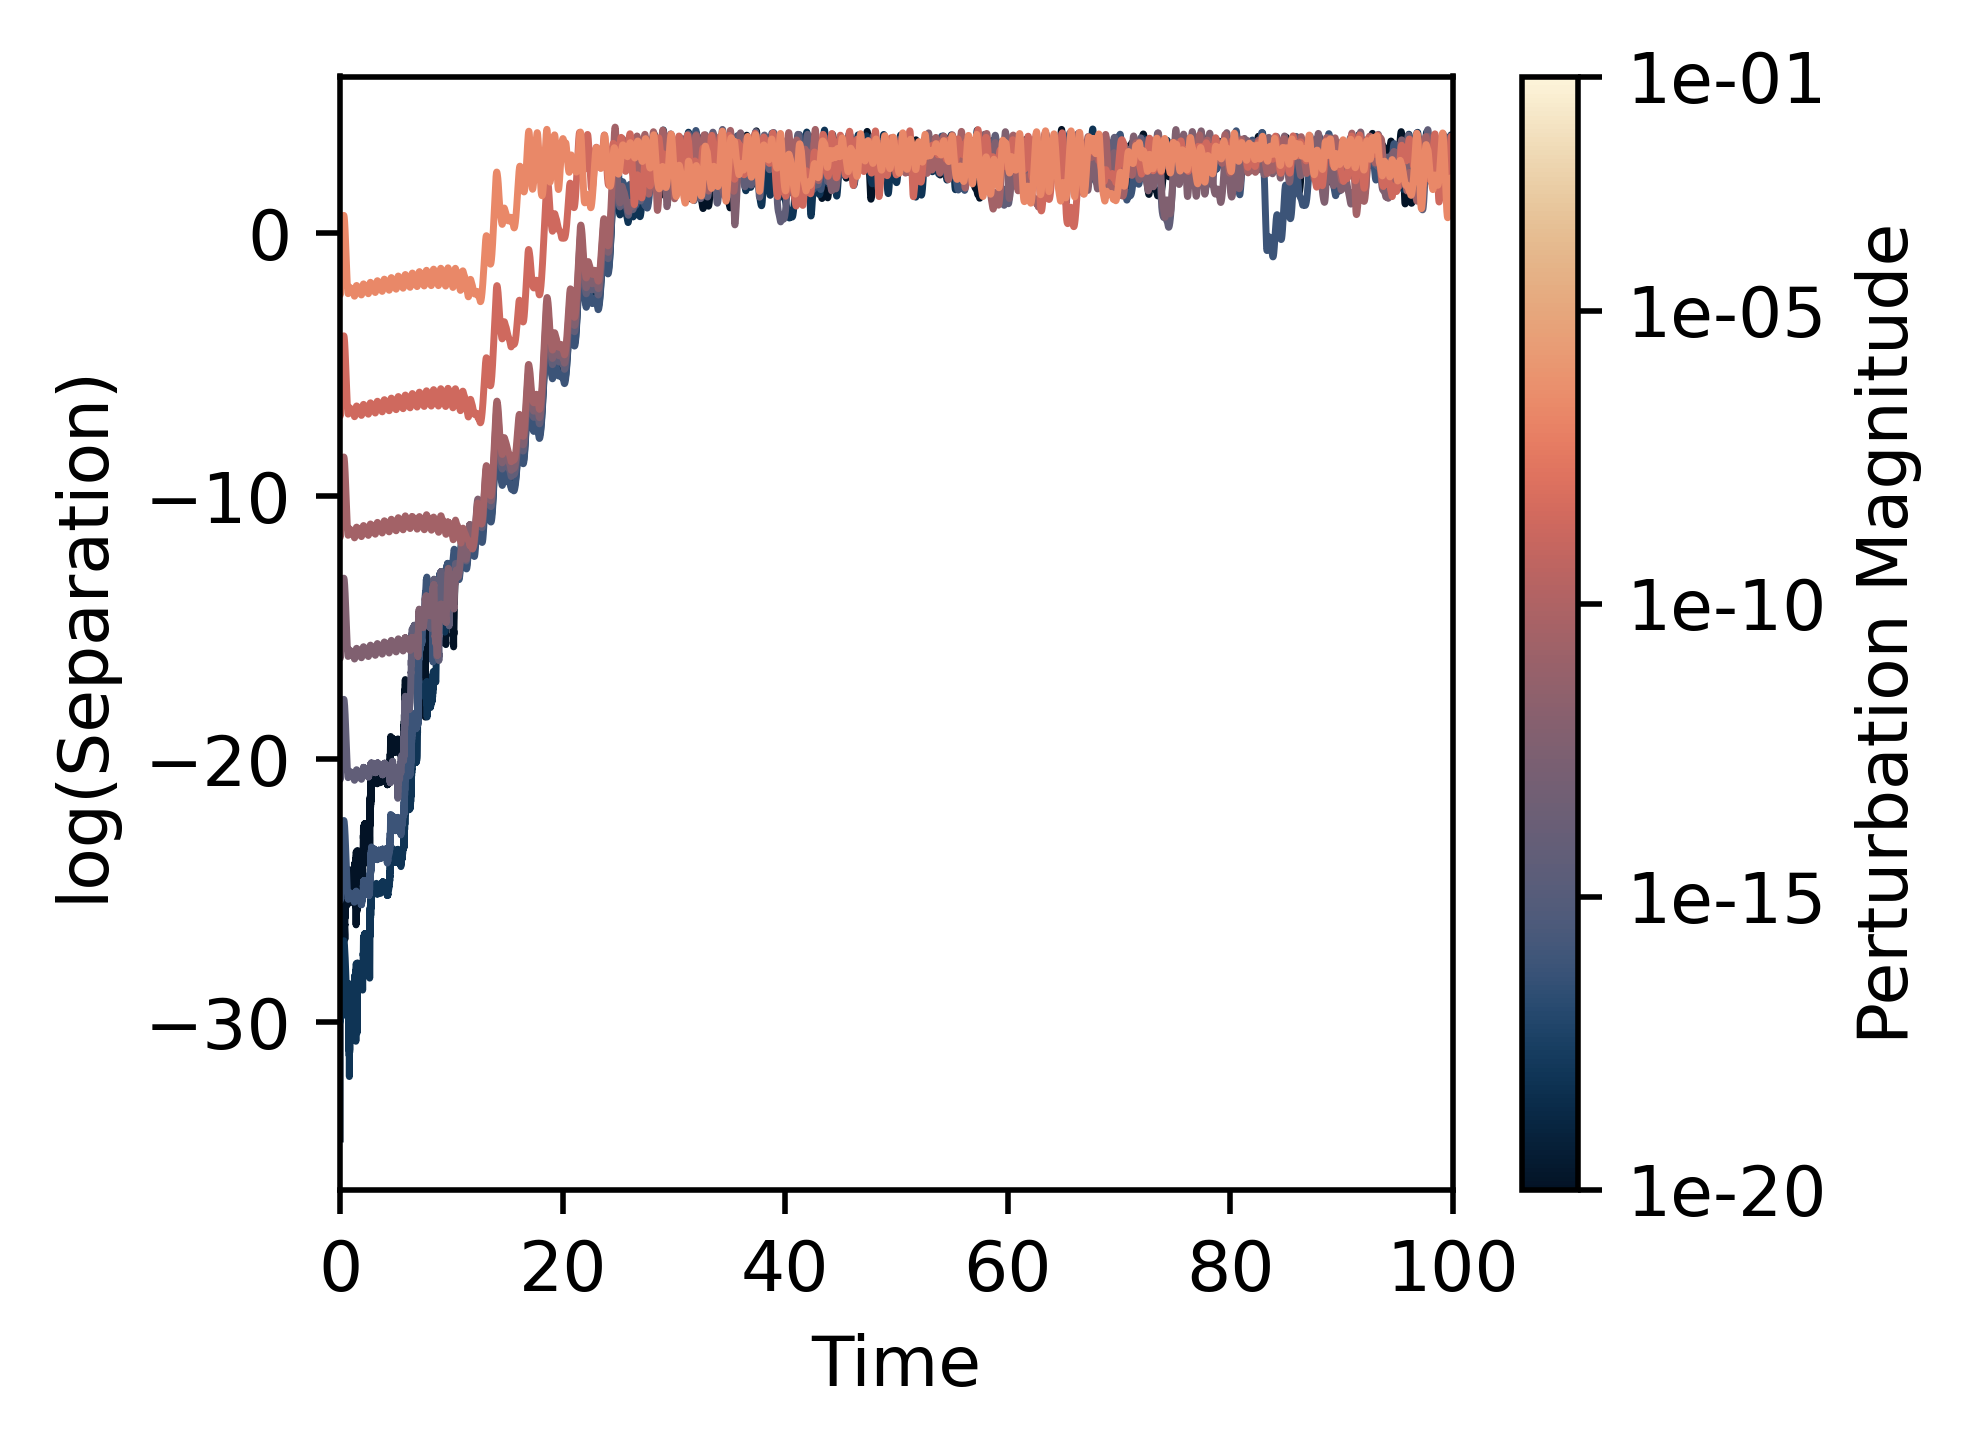

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from scipy.integrate import odeint

# Define the Lorenz system
def lorenz(state, t, sigma, beta, rho):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# Time range
tmax = 100
nt = 60001
t = np.linspace(0, tmax, nt)

# Initial condition
X0 = np.array([1.0, 1.0, 1.0])

# **Explicitly define perturbations for colorbar**
colorbar_perturbations = [1e-20, 1e-15, 1e-10, 1e-5, 1e-1]  # For colorbar only
plot_perturbations = np.logspace(-15, -1, num=8)  # 7 points, doubling previous count

# Set up figure with the same size
fig, ax = plt.subplots(figsize=(4, 3))

# Get colormap and apply the same color sampling range
cmap = cmc.lipari  # Use cmc.lipari for consistency
colors = cmap(np.linspace(0, 0.7, len(plot_perturbations)))  # Ensure correct mapping

# Define LogNorm for color normalization
norm = mcolors.LogNorm(vmin=min(colorbar_perturbations), vmax=max(colorbar_perturbations))

# Loop over perturbations (excluding 1e-20)
for i, perturbation in enumerate(plot_perturbations):
    X0_pert = X0 + np.array([perturbation, 0.0, 0.0])

    # Solve for both
    sol1 = odeint(lorenz, X0, t, args=(sigma, beta, rho))
    sol2 = odeint(lorenz, X0_pert, t, args=(sigma, beta, rho))

    # Calculate the distance between the two solutions at each time
    dist = np.sqrt(np.sum((sol1 - sol2) ** 2, axis=1))
    dist = np.clip(dist, 1e-30, None)  # Avoid log(0) issues
    log_dist = np.log(dist)

    # Plot log of separation vs time
    ax.plot(t, log_dist, label=f'Perturbation {perturbation:.0e}', color=colors[i], lw=1)

# Set plot limits and labels
ax.set_xlim([0, 100])
ax.set_xlabel('Time')
ax.set_ylabel('log(Separation)')

# Create the colorbar with manually defined ticks (keeping 1e-20)
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for colorbar
cbar = fig.colorbar(sm, ax=ax, ticks=colorbar_perturbations)
cbar.set_label("Perturbation Magnitude")
cbar.ax.set_yticklabels([f"{tick:.0e}" for tick in colorbar_perturbations])  # Format ticks in scientific notation

plt.tight_layout()
plt.show()
